In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df= pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.drop(["hotwaterheating","airconditioning"],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   parking           545 non-null    int64 
 9   prefarea          545 non-null    object
 10  furnishingstatus  545 non-null    object
dtypes: int64(6), object(5)
memory usage: 47.0+ KB


In [12]:
df.shape

(545, 11)

Text(0.5, 0, 'unique number of bedrooms')

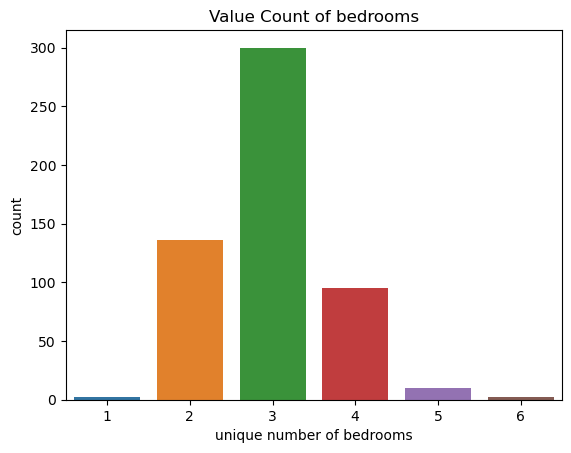

In [16]:
sns.countplot(x="bedrooms",data=df)
plt.title("Value Count of bedrooms")
plt.xlabel("unique number of bedrooms")

<Axes: >

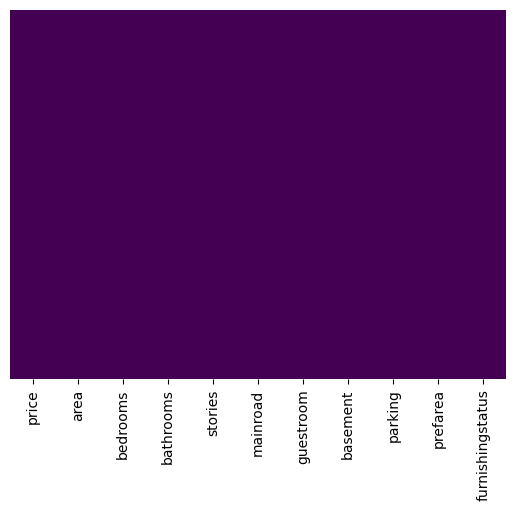

In [19]:
# checking for missing values
sns.heatmap(df.isna(),cmap='viridis',yticklabels=False,cbar=False)

In [20]:
mean = df["bedrooms"].mean()

In [21]:
df["bedrooms"].fillna(mean,inplace=True)

In [24]:
from sklearn.preprocessing import Lab.
encoded = encoder.fit_transform(df["mainroad"])
df["mainroad"]=encoded

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,2,no,furnished


In [26]:
encoded_gr= encoder.fit_transform(df["guestroom"])
df["guestroom"] = encoded_gr
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,2,no,furnished


In [27]:
X= df.drop(["price"],axis=1)
y = df["price"]

In [28]:
X[:5]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,no,2,yes,furnished
1,8960,4,4,4,1,0,no,3,no,furnished
2,9960,3,2,2,1,0,yes,2,yes,semi-furnished
3,7500,4,2,2,1,0,yes,3,yes,furnished
4,7420,4,1,2,1,1,yes,2,no,furnished


In [29]:
y[:5]

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
print("shape of training data o features",X_train.shape)
print("shape of training data o target",y_train.shape)
print("shape of training data o features",X_test.shape)
print("shape of training data o target",y_test.shape)

shape of training data o features (381, 10)
shape of training data o target (381,)
shape of training data o features (164, 10)
shape of training data o target (164,)


In [33]:
X_train.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,parking
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,5128.401575,2.958005,1.262467,1.782152,0.863517,0.186352,0.669291
std,2177.317846,0.752763,0.475044,0.862857,0.343752,0.389902,0.837180
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000
75%,6325.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,3.000000


In [34]:
X_test.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,parking
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,5201.975610,2.981707,1.341463,1.859756,0.847561,0.158537,0.750000
std,2159.133836,0.704696,0.558691,0.878420,0.360547,0.366362,0.915946
min,1700.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3510.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,4995.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000
75%,6450.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.250000
max,13200.000000,6.000000,3.000000,4.000000,1.000000,1.000000,3.000000


In [35]:
y_train.describe()

count    3.810000e+02
mean     4.762406e+06
std      1.774777e+06
min      1.750000e+06
25%      3.500000e+06
50%      4.382000e+06
75%      5.740000e+06
max      1.225000e+07
Name: price, dtype: float64

In [36]:
y_test.describe()

count    1.640000e+02
mean     4.776772e+06
std      2.081540e+06
min      1.750000e+06
25%      3.316250e+06
50%      4.270000e+06
75%      5.845000e+06
max      1.330000e+07
Name: price, dtype: float64